#  name : siddhesh dhande 71

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='notebook',palette='Spectral',style="darkgrid",font_scale=1.5,color_codes=True)

In [4]:
import pandas as pd

sett = pd.read_csv('Mall_Customers (1).csv',index_col='CustomerID')


In [5]:
sett.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [6]:
sett.describe()

,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [7]:
sett.shape

(200, 4)

In [8]:
sett.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Genre               200 non-null    object
 1   Age                 200 non-null    int64 
 2   Annual_Income_(k$)  200 non-null    int64 
 3   Spending_Score      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [9]:
sett.isnull().sum()

Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [10]:
sett.drop_duplicates(inplace=True)

In [11]:
sett.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [12]:
X = sett.iloc[:,[2,3]].values

In [13]:
pip install --upgrade scikit-learn  threadpoolctl


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/17/1c/ccdd103cfcc9435a18819856fbbe0c20b8fa60bfc3343580de4be13f0668/scikit_learn-1.5.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for threadpoolctl from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -------

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i , init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

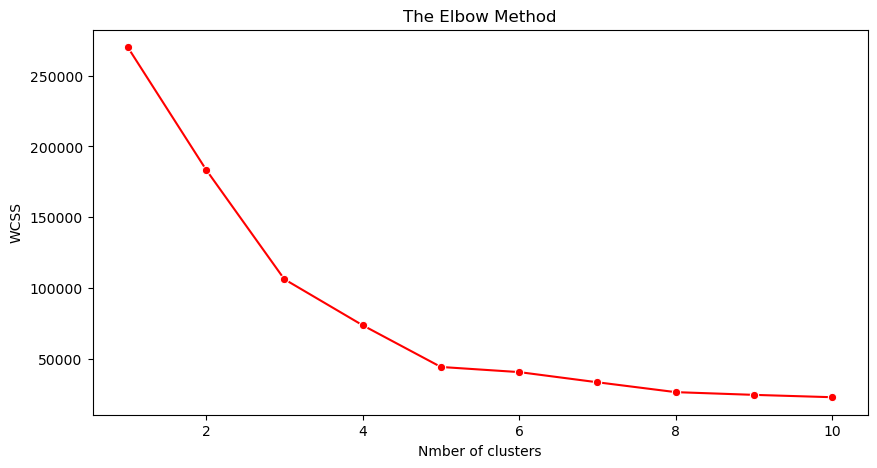

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.lineplot(x=range(1,11),y=wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Nmber of clusters')
plt.ylabel('WCSS')
plt.show()






In [22]:
y_kmeans = kmeans.fit_predict(X)

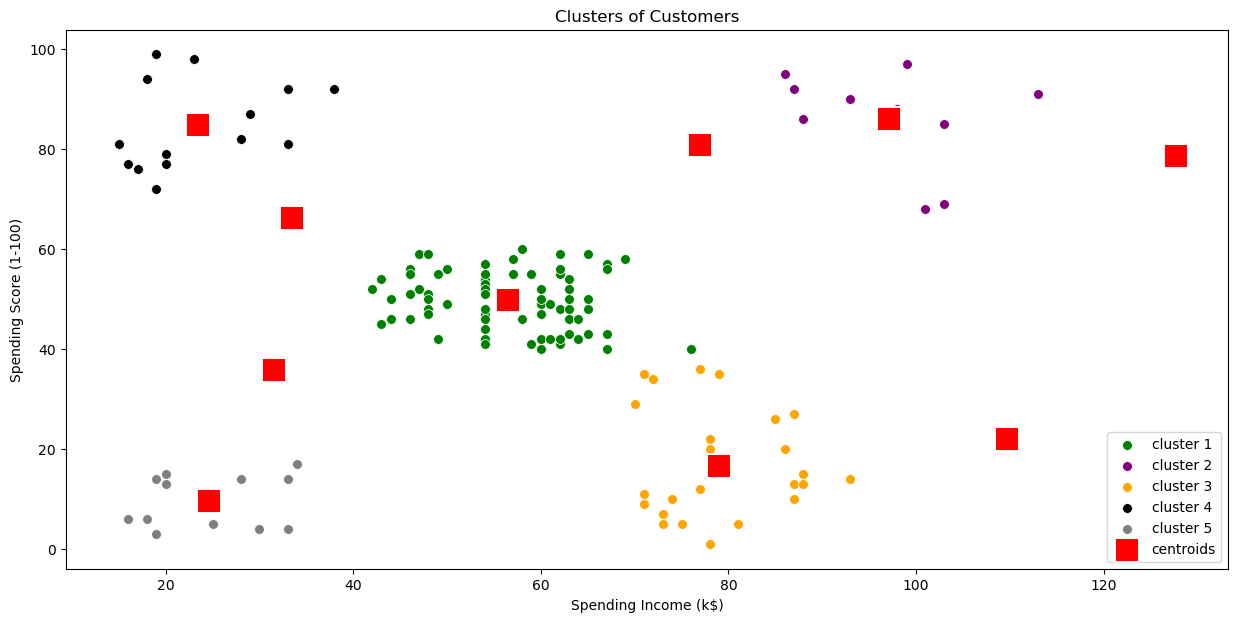

In [21]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], color='green', label='cluster 1', s=50)
sns.scatterplot(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], color='purple', label='cluster 2', s=50)
sns.scatterplot(x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1], color='orange', label='cluster 3', s=50)
sns.scatterplot(x=X[y_kmeans == 3, 0], y=X[y_kmeans == 3, 1], color='black', label='cluster 4', s=50)
sns.scatterplot(x=X[y_kmeans == 4, 0], y=X[y_kmeans == 4, 1], color='gray', label='cluster 5', s=50)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color='red', label='centroids',
                s=300, marker=',')

plt.grid(False)
plt.title('Clusters of Customers')
plt.xlabel('Spending Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [24]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)
clusters = kmeans.fit_predict(scaled_features)
data['Cluster'] = clusters
data.head(20)

,Feature1,Feature2,Cluster
0,1,10,2
1,2,20,4
2,3,30,4
3,4,40,0
4,5,50,0
5,6,60,3
6,7,70,3
7,8,80,1
8,9,90,1
9,10,100,1
